In [1]:
!pip install niapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.9/181.9 kB 2.5 MB/s eta 0:00:00


LOAD BOSTON DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rand
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

#DATA EXPLORATION

In [3]:
boston.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


In [5]:
boston.duplicated().sum()

0

Mengecek nilai null tiap column

In [6]:
boston.isnull().sum()

0       0
1       0
2       0
3     506
4     506
5     506
6     506
7     506
8     506
9     506
10    506
dtype: int64

In [7]:
boston.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.007820,0.621328,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
1,-0.007820,1.000000,-0.369513,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
2,0.621328,-0.369513,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853


<Axes: >

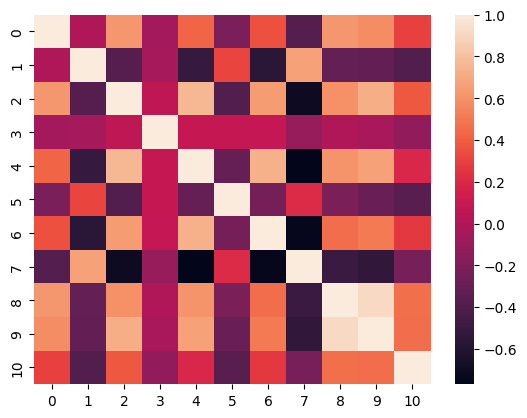

In [8]:
sns.heatmap(boston.corr())

#PRE-PROCESSING

Mengisi data null

```
# This is formatted as code
```

 dengan menilai nilai skweness

In [9]:
def FillNanSkew(dataset):
  skew = dataset.skew(axis=0, skipna=True)
  #skewness > 2 or < -2 = median
  #else mean
  for i in range(len(skew)):
    if skew[i] > -2 and skew[i] < 2 :
      dataset[i].fillna(dataset[i].mean(),inplace=True)
    else:
      dataset[i].fillna(dataset[i].median(),inplace=True)
  return dataset

fillable = FillNanSkew(boston)
fillable

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000
1,396.90000,4.98,24.00,0.0,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
2,0.02731,0.00,7.07,0.0,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000
3,396.90000,9.14,21.60,0.0,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
4,0.02729,0.00,7.07,0.0,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,0.0,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
1008,0.10959,0.00,11.93,0.0,0.573000,6.794000,89.300000,2.388900,1.000000,273.000000,21.000000
1009,393.45000,6.48,22.00,0.0,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
1010,0.04741,0.00,11.93,0.0,0.573000,6.030000,80.800000,2.505000,1.000000,273.000000,21.000000


mengisi variabel data dan target untuk persiapan split data

In [10]:
data = np.hstack([fillable.values[::2, :], fillable.values[1::2, :2]])
target = fillable.values[1::2, 2]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1234)

# ADABOOST HYPERPARAMETER TUNING

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from typing import Callable

from niapy.problems import Problem
from niapy.task import OptimizationType, Task
from niapy.algorithms.basic import CuckooSearch

HYPER PARAMETER UNTUK ADABOOST

PARAMETER UNTUK ADABOOST :

* BASE_ESTIMATOR : OBJECT, DEFAULT = DecisionTree(max_depth=3)
* N_ESTIMATOR : INTEGER , DEFAULT = 50
* LEARNING RATE : FLOAT [1.0,Inf] , DEFAULT = 1.0
* LOSS : {'linear','square','exponential'} , DEFAULT = 'linear'





In [13]:
class HyperparameterOptimization(Problem):
  def __init__(self, X_train, y_train, get_hyperparameters : Callable, ML_Model : Callable, dimension=4,scoring=None):
      super().__init__(dimension=dimension, lower=0, upper=1)
      self.X_train = X_train
      self.y_train = y_train
      self.get_hyperparameter = get_hyperparameters
      self.ML_Model = ML_Model
      self.scoring = scoring

  def _model(self,x):
      params = self.get_hyperparameter(x)
      return self.ML_Model(**params)

  def _evaluate(self, x):
      #print(x)
      model = self._model(x)
      scores = cross_val_score(model, self.X_train, self.y_train,scoring=self.scoring, n_jobs=-1)
      return abs(scores.mean())

In [14]:


class AdaBoostHyperparameterOptimizer():

  def __init__(self, nia_optimizer : Callable, max_iters=100,population_size=50, seed=None):
      self.max_iters=max_iters
      self.algorithm = nia_optimizer(population_size=population_size, seed=seed)
      self.model = AdaBoostRegressor()

  def get_hyperparameter(self,x):

      losses = ('linear', 'square', 'exponential')
      n_estimators = abs(int(1 + x[0] * 100))
      learning_rate = 0.1 + abs(x[1] * 5)
      loss = losses[int(x[2] * 10 % 3)]
      max_depth = 2 + int(x[3] * 10 % 3)
      params =  {
          'base_estimator': DecisionTreeRegressor(max_depth=max_depth),
          'n_estimators': n_estimators,
          'learning_rate': learning_rate,
          'loss': loss
      }
      print(x)
      return params

  def optimize(self,X_train, y_train):
      self.X_train = X_train
      self.y_train = y_train
      print("Optimizing with",self.max_iters," epochs")
      problem = HyperparameterOptimization(
          X_train,
          y_train,
          dimension=4,
          get_hyperparameters=self.get_hyperparameter,
          ML_Model=AdaBoostRegressor,
          scoring='neg_mean_squared_error'
      )
      task = Task(problem, max_iters=self.max_iters)
      best_params, best_accuracy = self.algorithm.run(task)
      self.best_params = self.get_hyperparameter(best_params)
      print("Best Parameters:",self.best_params)
      print("Best Accuracy:", best_accuracy)
      self.model = AdaBoostRegressor(**self.best_params)
      return self.model

  def get_parameters(self):
      return self.best_params

  def fit(self,X_train, y_train,sample_weight=None):
      return self.model.fit(X_train,y_train,sample_weight=sample_weight)

  def optimized_fit(self,X_train, y_train,sample_weight=None):
      self.optimize(X_train, y_train)
      return self.model.fit(X_train,y_train,sample_weight=sample_weight)

  def predict(self,X):
      return self.model.predict(X)

  def score(self,X,y,sample_weight=None):
      return self.model.score(X,y,sample_weight=sample_weight)



# CUCKOO SEARCH Algorithm

In [15]:
from sklearn.metrics import mean_squared_error
import math

default_model = AdaBoostRegressor()
best_model = AdaBoostHyperparameterOptimizer(CuckooSearch,population_size=10,seed=1234)

default_model.fit(X_train, y_train)
best_model.optimized_fit(X_train, y_train)


Optimizing with 100  epochs
[0.97669977 0.38019574 0.92324623 0.26169242]
[0.31909706 0.11809123 0.24176629 0.31853393]
[0.96407925 0.2636498  0.44100612 0.60987081]
[0.8636213  0.86375767 0.67488131 0.65987435]
[0.7357577  0.22275366 0.17206618 0.87041497]
[0.06013866 0.68368891 0.67123802 0.61101798]
[0.06013731 0.97776927 0.43895163 0.53259502]
[0.00313229 0.25126711 0.85849044 0.42529835]
[0.73581899 0.92204322 0.15347417 0.99225923]
[0.18233178 0.9401129  0.08688306 0.46821072]
[0.97669977 0.38019574 0.92324623 0.26169242]
[0.3196958  0.11684248 0.23250774 0.31812481]
[0.96410827 0.27319079 0.44208643 0.61068291]
[0.86341733 0.86331168 0.67366103 0.65987225]
[0.7351098  0.22303485 0.17307436 0.86607257]
[0.06719185 0.68346942 0.67110406 0.61035251]
[0.05985976 0.97756618 0.44407004 0.53301086]
[0.02496055 0.2510521  0.85722566 0.4252372 ]
[0.72909736 0.92241241 0.20013621 0.99452309]
[0.15288505 0.9419162  0.08826403 0.46813355]
[0.91153539 0.09486902 1.         0.26169242]
[0.211

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=1.4019913486180617, n_estimators=85)

In [16]:
default_model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=1.4019913486180617, n_estimators=85)

In [17]:

from tabulate import tabulate

y_pred_default = default_model.predict(X_test)
y_pred_best = best_model.predict(X_test)

evaluation_label = [
  "algorithm",
  "max_error",
  "mean_absolute_error",
  "mean_squared_error",
  "mean_squared_log_error",
  "median_absolute_error",
  "mean_absolute_percentage_error",
  "r2_score"
]


default_evaluation = [
  "Default",
  "None",
  metrics.max_error(y_test, y_pred_default),
  metrics.mean_absolute_error(y_test, y_pred_default),
  metrics.mean_squared_error(y_test, y_pred_default),
  metrics.mean_squared_log_error(y_test, y_pred_default),
  metrics.median_absolute_error(y_test, y_pred_default),
  metrics.mean_absolute_percentage_error(y_test, y_pred_default),
  metrics.r2_score(y_test, y_pred_default)
]

best_evaluation = [
  "Hyperparameter",
  "Cuckoo Search",
  metrics.max_error(y_test, y_pred_best),
  metrics.mean_absolute_error(y_test, y_pred_best),
  metrics.mean_squared_error(y_test, y_pred_best),
  metrics.mean_squared_log_error(y_test, y_pred_best),
  metrics.median_absolute_error(y_test, y_pred_best),
  metrics.mean_absolute_percentage_error(y_test, y_pred_best),
  metrics.r2_score(y_test, y_pred_best)
]
print(tabulate([default_evaluation,best_evaluation], evaluation_label, tablefmt="grid"))

+----------------+---------------+-------------+-----------------------+----------------------+--------------------------+-------------------------+----------------------------------+------------+
|                | algorithm     |   max_error |   mean_absolute_error |   mean_squared_error |   mean_squared_log_error |   median_absolute_error |   mean_absolute_percentage_error |   r2_score |
+================+===============+=============+=======================+======================+==========================+=========================+==================================+============+
| Default        | None          |     14.3711 |               2.64703 |              13.742  |                0.0409277 |                 2.01201 |                         0.154216 |   0.866126 |
+----------------+---------------+-------------+-----------------------+----------------------+--------------------------+-------------------------+----------------------------------+------------+
| Hyperparamete

# EXPERIMENT 1 : FEATURE SELECTION + HYPERPARAMETER TUNING

Source : https://niapy.org/en/stable/tutorials/feature_selection.html


In [18]:
class AdaBoostFeatureSelection(Problem):
    def __init__(self, X_train, y_train, model=AdaBoostRegressor(), alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha
        self.model = model

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        score = abs(cross_val_score(self.model, self.X_train[:, selected], self.y_train, scoring='neg_root_mean_squared_error', n_jobs=-1).mean())
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [19]:

problem = AdaBoostFeatureSelection(X_train, y_train, model=best_model.model)
task = Task(problem, max_iters=100)
algorithm = CuckooSearch(population_size=10, seed=1234)
best_features, best_fitness = algorithm.run(task)

In [20]:

selected_features = best_features > 0.5

print('Number of features:', data.shape[1])
print('Number of selected features:', selected_features.sum())

model_selected = best_model

model_selected.fit(X_train[:, selected_features], y_train)
y_pred_exp = model_selected.predict(X_test[:, selected_features])

experiment_evaluation = [
  "Feature Selection + Hyperparameter",
  "Cuckoo Search",
  metrics.max_error(y_test, y_pred_exp),
  metrics.mean_absolute_error(y_test, y_pred_exp),
  metrics.mean_squared_error(y_test, y_pred_exp),
  metrics.mean_squared_log_error(y_test, y_pred_exp),
  metrics.median_absolute_error(y_test, y_pred_exp),
  metrics.mean_absolute_percentage_error(y_test, y_pred_exp),
  metrics.r2_score(y_test, y_pred_exp)
]

print(tabulate([default_evaluation,best_evaluation,experiment_evaluation], evaluation_label, tablefmt="grid"))



Number of features: 13
Number of selected features: 9
+------------------------------------+---------------+-------------+-----------------------+----------------------+--------------------------+-------------------------+----------------------------------+------------+
|                                    | algorithm     |   max_error |   mean_absolute_error |   mean_squared_error |   mean_squared_log_error |   median_absolute_error |   mean_absolute_percentage_error |   r2_score |
+====================================+===============+=============+=======================+======================+==========================+=========================+==================================+============+
| Default                            | None          |     14.3711 |               2.64703 |              13.742  |                0.0409277 |                 2.01201 |                         0.154216 |   0.866126 |
+------------------------------------+---------------+-------------+----------

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#EXPERIMENT 2: HYPERPARAMTER TUNING PSO ALGORITHM

In [21]:
from niapy.algorithms.basic import ParticleSwarmOptimization

In [22]:
pso_model = AdaBoostHyperparameterOptimizer(ParticleSwarmOptimization,population_size=10,seed=1234)

pso_model.optimized_fit(X_train, y_train)

y_pred_pso = pso_model.predict(X_test)

pso_evaluation = [
  "Hyperparameter",
  "PSO",
  metrics.max_error(y_test, y_pred_default),
  metrics.mean_absolute_error(y_test, y_pred_default),
  metrics.mean_squared_error(y_test, y_pred_default),
  metrics.mean_squared_log_error(y_test, y_pred_default),
  metrics.median_absolute_error(y_test, y_pred_default),
  metrics.mean_absolute_percentage_error(y_test, y_pred_default),
  metrics.r2_score(y_test, y_pred_default)
]

print(tabulate([default_evaluation,best_evaluation,experiment_evaluation,pso_evaluation], evaluation_label, tablefmt="grid"))


Optimizing with 100  epochs
[0.97669977 0.38019574 0.92324623 0.26169242]
[0.31909706 0.11809123 0.24176629 0.31853393]
[0.96407925 0.2636498  0.44100612 0.60987081]
[0.8636213  0.86375767 0.67488131 0.65987435]
[0.7357577  0.22275366 0.17206618 0.87041497]
[0.06013866 0.68368891 0.67123802 0.61101798]
[0.06013731 0.97776927 0.43895163 0.53259502]
[0.00313229 0.25126711 0.85849044 0.42529835]
[0.73581899 0.92204322 0.15347417 0.99225923]
[0.18233178 0.9401129  0.08688306 0.46821072]
[0.97669977 0.38019574 0.92324623 0.26169242]
[0.90950696 0.27823749 1.         0.23315414]
[0.97148753 0.43457945 1.         0.        ]
[0.96587402 0.35000107 1.         0.65511355]
[0.89309022 0.28521351 1.         0.09475437]
[1.         0.60082072 1.         0.26288466]
[0.20008806 0.93736511 0.88606531 0.05915266]
[0.58306714 0.41092227 0.89757152 0.36808652]
[1.         0.57996873 0.58026108 0.        ]
[0.78653304 0.03516724 0.30024544 0.07527268]
[0.97669977 0.38019574 0.92324623 0.26169242]
[1.   

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


+------------------------------------+---------------+-------------+-----------------------+----------------------+--------------------------+-------------------------+----------------------------------+------------+
|                                    | algorithm     |   max_error |   mean_absolute_error |   mean_squared_error |   mean_squared_log_error |   median_absolute_error |   mean_absolute_percentage_error |   r2_score |
+====================================+===============+=============+=======================+======================+==========================+=========================+==================================+============+
| Default                            | None          |     14.3711 |               2.64703 |              13.742  |                0.0409277 |                 2.01201 |                         0.154216 |   0.866126 |
+------------------------------------+---------------+-------------+-----------------------+----------------------+-----------------